In [16]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [11]:
file = glob.iglob('*.csv')
df = pd.read_csv(*file)
print(df.head())
print('-------------------------------------')
print(df.tail())

# Spliting the dataframe into Dependent and Independent Variable
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values

print(X)
print(Y)

Y = Y.reshape(len(Y), 1)
print(Y)

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
-------------------------------------
         Position  Level   Salary
5  Region Manager      6   150000
6         Partner      7   200000
7  Senior Partner      8   300000
8         C-level      9   500000
9             CEO     10  1000000
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [13]:
# Feature Scaling
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
Y = sc_y.fit_transform(Y)

print(X)
print(Y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [15]:
# Training the model
regressor = SVR(kernel='rbf')
regressor.fit(X, Y)

SVR()

In [27]:
# prediction the results
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([131106.77303274])

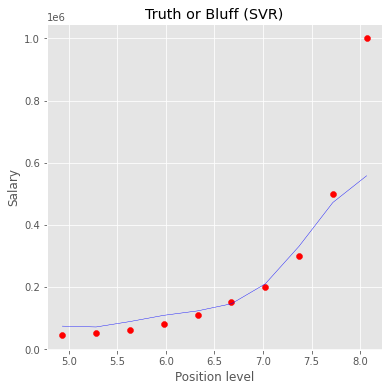

In [33]:
# Visualizing the results

figure = plt.figure(figsize = (6,6))

plt.scatter(sc_x.inverse_transform(X),
            sc_y.inverse_transform(Y),
            color = 'red')

plt.plot(sc_x.inverse_transform(X),
         sc_y.inverse_transform(regressor.predict(X)),
         linewidth= 0.4,
         color = 'blue')

plt.title('Truth or Bluff (SVR)')

plt.xlabel('Position level')

plt.ylabel('Salary')

plt.show()

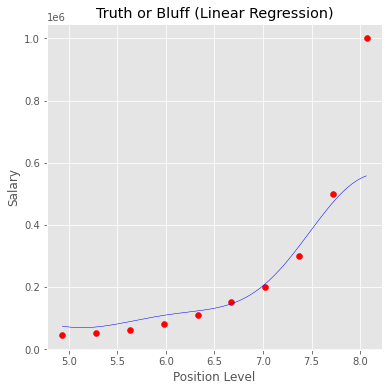

In [39]:
# Smothing out the curve

figure = plt.figure(figsize = (6,6))

X_grid = np.arange(min(sc_x.inverse_transform(X)), 
                   max(sc_x.inverse_transform(X)), 
                   0.01)

X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_x.inverse_transform(X), 
            sc_y.inverse_transform(Y), 
            color = 'red')

plt.plot(X_grid, 
         sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid))),
         color = 'blue', 
         linewidth = 0.5)

plt.title('Truth or Bluff (Linear Regression)')

plt.xlabel('Position Level')

plt.ylabel('Salary')

plt.show()